In [1]:
library(ArchR)

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats

In [2]:
PBMC_10X_proj1 = loadArchRProject(path = "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/")

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [3]:
addArchRThreads(threads = 16) 

Setting default number of Parallel threads to 16.



In [4]:
addArchRGenome("hg38")

BSgenome for hg38 not installed! Now installing by the following:
	BiocManager::install("BSgenome.Hsapiens.UCSC.hg38")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.13 (BiocManager 1.30.15), R 4.1.0 (2021-05-18)

Installing package(s) 'BSgenome.Hsapiens.UCSC.hg38'

Installation paths not writeable, unable to update packages
  path: /pkg/R-4.1.0-0/lib/R/library
  packages:
    AnnotationDbi, AnnotationForge, AnnotationHub, BBmisc, BatchJobs,
    BiocManager, BiocParallel, BiocSingular, BiocStyle, Biostrings, Boruta,
    C50, Cairo, ChIPpeakAnno, Ckmeans.1d.dp, ComplexHeatmap, Cubist, DBI,
    DEoptimR, DOSE, DT, DelayedMatrixStats, EDASeq, EnrichedHeatmap, Formula,
    GA, GGally, GOSemSim, GeneNet, GenomeInfoDb, GenomicFeatures, Gviz, HMM,
    HardyWeinberg, Hmisc, KernSmooth, Lahman, MatrixGenerics, MatrixModels,
    NMF, PerfMeas, R.cache, R.ma

In [5]:
doubScores <- addDoubletScores(
    input = PBMC_10X_proj1,
    k = 10, #Refers to how many cells near a "pseudo-doublet" to count.
    knnMethod = "UMAP", #Refers to the embedding to use for nearest neighbor search with doublet projection.
    LSIMethod = 1
)

ArchR logging to : ArchRLogs/ArchR-addDoubletScores-9449cfc559a-Date-2024-05-01_Time-22-10-48.log
If there is an issue, please report to github with logFile!

2024-05-01 22:10:51 : Batch Execution w/ safelapply!, 0 mins elapsed.

2024-05-01 22:10:52 : pbmc_granulocyte_sorted_10k_atac (1 of 1) :  Computing Doublet Statistics, 0.005 mins elapsed.

pbmc_granulocyte_sorted_10k_atac (1 of 1) : UMAP Projection R^2 = 0.99422

pbmc_granulocyte_sorted_10k_atac (1 of 1) : UMAP Projection R^2 = 0.99422

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
ArchR logging successful to : ArchRLogs/ArchR-addDoubletScores-9449cfc559a-Date-2024-05-01_Time-22-10-48.log



ArchR logging to : ArchRLogs/ArchR-plotFragmentSizes-94497f33172f-Date-2024-05-01_Time-22-25-17.log
If there is an issue, please report to github with logFile!

2024-05-01 22:25:20 : pbmc_granulocyte_sorted_10k_atac Computing FragmentSizes (1 of 1)!, 0.05 mins elapsed.

2024-05-01 22:29:22 : pbmc_granulocyte_sorted_10k_atac Finished Computing FragmentSizes (1 of 1)!, 4.083 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotFragmentSizes-94497f33172f-Date-2024-05-01_Time-22-25-17.log



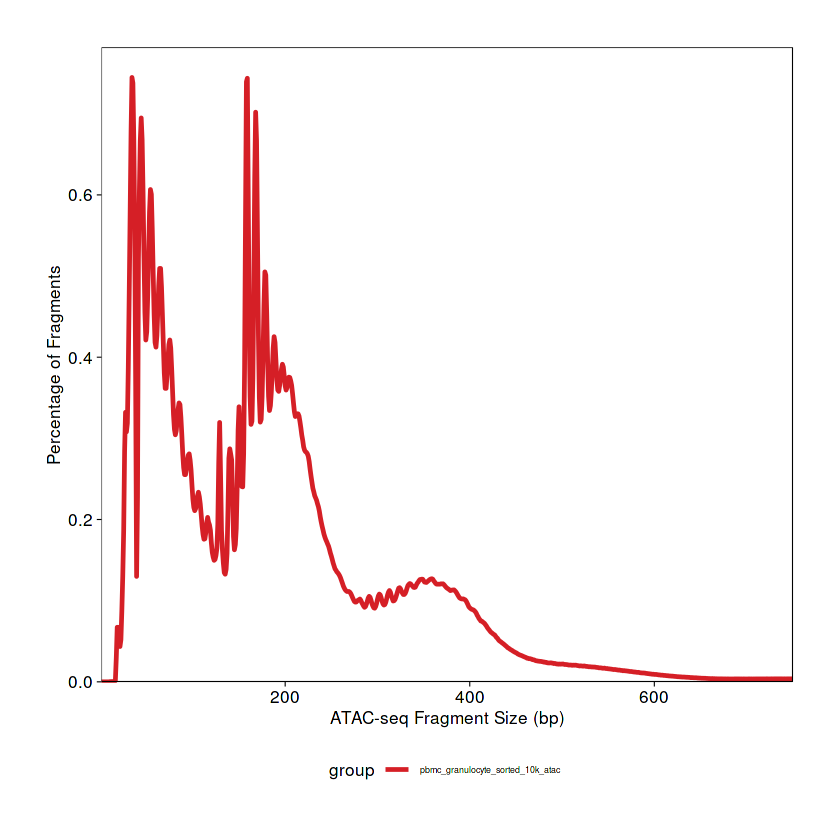

In [6]:
p1 <- plotFragmentSizes(ArchRProj = PBMC_10X_proj1)
p1

In [7]:
PBMC_10X_proj1 <- addIterativeLSI(
    ArchRProj = PBMC_10X_proj1,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 2, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.2), 
        sampleCells = 10000, 
        n.start = 10
    ), 
    varFeatures = 25000, 
    dimsToUse = 1:30
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-94493df42241-Date-2024-05-01_Time-22-29-24.log
If there is an issue, please report to github with logFile!

2024-05-01 22:29:29 : Computing Total Across All Features, 0.003 mins elapsed.

2024-05-01 22:29:33 : Computing Top Features, 0.071 mins elapsed.

###########
2024-05-01 22:29:38 : Running LSI (1 of 2) on Top Features, 0.15 mins elapsed.
###########

2024-05-01 22:29:38 : Sampling Cells (N = 10000) for Estimated LSI, 0.153 mins elapsed.

2024-05-01 22:29:38 : Creating Sampled Partial Matrix, 0.154 mins elapsed.

2024-05-01 22:31:20 : Computing Estimated LSI (projectAll = FALSE), 1.859 mins elapsed.

2024-05-01 22:39:10 : Identifying Clusters, 9.69 mins elapsed.

2024-05-01 22:40:01 : Identified 10 Clusters, 10.54 mins elapsed.

2024-05-01 22:40:02 : Saving LSI Iteration, 10.545 mins elapsed.

2024-05-01 22:41:07 : Creating Cluster Matrix on the total Group Features, 11.631 mins elapsed.

2024-05-01 22:41:45 : 

In [8]:
PBMC_10X_proj1 <- addClusters(
    input = PBMC_10X_proj1,
    reducedDims = "IterativeLSI",
    method = "Seurat",
    name = "Clusters",
    resolution = 0.8
)

ArchR logging to : ArchRLogs/ArchR-addClusters-9449f9cb1ef-Date-2024-05-01_Time-22-47-13.log
If there is an issue, please report to github with logFile!

2024-05-01 22:47:19 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.005 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11582
Number of edges: 475750

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8986
Number of communities: 20
Elapsed time: 12 seconds


2024-05-01 22:48:15 : Testing Biased Clusters, 0.946 mins elapsed.

2024-05-01 22:48:16 : Identified Biased Clusters (n = 1), set filterBias = TRUE to re-assign these cells: , 0.955 mins elapsed.

Biased Clusters : 
Cluster2 


2024-05-01 22:48:16 : Testing Outlier Clusters, 0.957 mins elapsed.

2024-05-01 22:48:16 : Assigning Cluster Names to 20 Clusters, 0.958 mins elapsed.

2024-05-01 22:48:17 : Finished addClusters, 0.968 mins elapsed.



In [9]:
proj_GSM3722015_PBMC_Rep1 <- addUMAP(
    ArchRProj = PBMC_10X_proj1, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine"
)

22:48:17 UMAP embedding parameters a = 0.583 b = 1.334

22:48:17 Read 11582 rows and found 30 numeric columns

22:48:17 Using Annoy for neighbor search, n_neighbors = 30

22:48:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:48:23 Writing NN index file to temp file /scratch/local/RtmpeKts5Q/file94497977caac

22:48:23 Searching Annoy index using 64 threads, search_k = 3000

22:48:23 Annoy recall = 100%

22:48:27 Commencing smooth kNN distance calibration using 64 threads
 with target n_neighbors = 30

22:48:31 Initializing from normalized Laplacian + noise (using irlba)

22:48:33 Commencing optimization for 200 epochs, with 513342 positive edges

22:48:50 Optimization finished

22:48:51 Creating temp model dir /scratch/local/RtmpeKts5Q/dir94496cb4da24

22:48:51 Cr

In [15]:
HDF5_USE_FILE_LOCKING=FALSE
RHDF5_USE_FILE_LOCKING=FALSE

In [16]:
addArchRThreads(threads = 1) 

Setting default number of Parallel threads to 1.



In [17]:
getArchRThreads()

[1] 1

In [19]:
PBMC_10X_proj2 <- addGroupCoverages(ArchRProj = PBMC_10X_proj1, groupBy = "Clusters")

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-9449e9b01be-Date-2024-05-01_Time-23-11-35.log
If there is an issue, please report to github with logFile!

C1 (1 of 20) : CellGroups N = 2

C2 (2 of 20) : CellGroups N = 2

C3 (3 of 20) : CellGroups N = 2

C4 (4 of 20) : CellGroups N = 2

C5 (5 of 20) : CellGroups N = 2

C6 (6 of 20) : CellGroups N = 2

C7 (7 of 20) : CellGroups N = 2

C8 (8 of 20) : CellGroups N = 2

C9 (9 of 20) : CellGroups N = 2

C10 (10 of 20) : CellGroups N = 2

C11 (11 of 20) : CellGroups N = 2

C12 (12 of 20) : CellGroups N = 2

C13 (13 of 20) : CellGroups N = 2

C14 (14 of 20) : CellGroups N = 2

C15 (15 of 20) : CellGroups N = 2

C16 (16 of 20) : CellGroups N = 2

C17 (17 of 20) : CellGroups N = 2

C18 (18 of 20) : CellGroups N = 2

C19 (19 of 20) : CellGroups N = 2

C20 (20 of 20) : CellGroups N = 2

2024-05-01 23:11:47 : Creating Coverage Files!, 0.186 mins elapsed.

2024-05-01 23:11:47 : Batch Execution w/ safelapply!, 0.186 mins elapsed.

2024-05-01 23:

In [20]:
save.image("/project/scATAC_analysis/scATAcat_review/preprocessing/Satpathy2019/PBMC_Rep1_scATAC/04_preprocessing_for_EpiAnno/WS/WS.RData") 

In [12]:
h5ls(getArrowFiles(PBMC_10X_proj1)[1])

,group,name,otype,dclass,dim
,<chr>,<chr>,<chr>,<chr>,<chr>
0,/,ArchRVersion,H5I_DATASET,STRING,1
1,/,Class,H5I_DATASET,STRING,1
2,/,Fragments,H5I_GROUP,,
3,/Fragments,chr1,H5I_GROUP,,
4,/Fragments/chr1,RGLengths,H5I_DATASET,INTEGER,11582 x 1
5,/Fragments/chr1,RGValues,H5I_DATASET,STRING,11582 x 1
6,/Fragments/chr1,Ranges,H5I_DATASET,INTEGER,16565095 x 2
7,/Fragments,chr10,H5I_GROUP,,
8,/Fragments/chr10,RGLengths,H5I_DATASET,INTEGER,11582 x 1


In [21]:
pathToMacs2 <- findMacs2()

Searching For MACS2..

Found with $path!



In [22]:
PBMC_10X_proj2 <- addReproduciblePeakSet(
    ArchRProj = PBMC_10X_proj2, 
    groupBy = "Clusters", 
    pathToMacs2 = pathToMacs2
)

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-94494a5fe6c7-Date-2024-05-02_Time-09-04-12.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2024-05-02 09:04:17 : Peak Calling Parameters!, 0.078 mins elapsed.



    Group nCells nCellsUsed nReplicates nMin nMax maxPeaks
C1     C1     29         28           2   17   22    14000
C2     C2     98         98           2   40   58    49000
C3     C3    550        540           2   40  500   150000
C4     C4    186        186           2   40  146    93000
C5     C5    435        435           2   40  395   150000
C6     C6   1833        540           2   40  500   150000
C7     C7   1072        540           2   40  500   150000
C8     C8   1007        540           2   40  500   150000
C9     C9    813        540           2   40  500   150000
C10   C10   1404        540           2   40  500   150000
C11   C11   1149        540           2   40  500   150000
C12   C12    400        400           2   40  360   150000
C13   C13    456        456           2   40  416   150000
C14   C14    126        126           2   40   86    63000
C15   C15    100        100           2   40   60    50000
C16   C16    860        540           2   40  500   1500

2024-05-02 09:04:17 : Batching Peak Calls!, 0.085 mins elapsed.

2024-05-02 09:04:19 : Batch Execution w/ safelapply!, 0 mins elapsed.

2024-05-02 09:04:19 : Group 1 of 38, Calling Peaks with MACS2!, 0.001 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 2.7e+09 --name C2._.Rep1-1 --treatment /project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/InsertionBeds/C2._.Rep1-1.insertions.bed --outdir /project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/InsertionBeds --format BED --call-summits --keep-dup all --nomodel --nolambda --shift -75 --extsize 150 -q 0.1

2024-05-02 09:09:40 : Group 2 of 38, Calling Peaks with MACS2!, 5.359 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 2.7e+09 --name C2._.Rep2-2 --treatment /project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/InsertionBeds/C2._.R

[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C10-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C11-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C12-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C13-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C14-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C15-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C16-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C17-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C18-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C19-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C2-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C20-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C3-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C4-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C5-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C6-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C7-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C8-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome/PeakCalls/C9-reproduciblePeaks.gr.rds"


2024-05-02 11:36:20 : Creating Union Peak Set!, 152.12 mins elapsed.

Converged after 12 iterations!

Plotting Ggplot!

2024-05-02 11:36:30 : Finished Creating Union Peak Set (180451)!, 152.295 mins elapsed.



In [25]:
PBMC_10X_proj3 <- addPeakMatrix(PBMC_10X_proj2)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-9449773a3307-Date-2024-05-02_Time-11-43-29.log
If there is an issue, please report to github with logFile!

2024-05-02 11:43:30 : Batch Execution w/ safelapply!, 0 mins elapsed.

2024-05-02 11:43:31 : Adding pbmc_granulocyte_sorted_10k_atac to PeakMatrix for Chr (1 of 23)!, 0.025 mins elapsed.

2024-05-02 11:43:51 : Adding pbmc_granulocyte_sorted_10k_atac to PeakMatrix for Chr (2 of 23)!, 0.358 mins elapsed.

2024-05-02 11:44:04 : Adding pbmc_granulocyte_sorted_10k_atac to PeakMatrix for Chr (3 of 23)!, 0.575 mins elapsed.

2024-05-02 11:44:15 : Adding pbmc_granulocyte_sorted_10k_atac to PeakMatrix for Chr (4 of 23)!, 0.746 mins elapsed.

2024-05-02 11:44:22 : Adding pbmc_granulocyte_sorted_10k_atac to PeakMatrix for Chr (5 of 23)!, 0.871 mins elapsed.

2024-05-02 11:44:32 : Adding pbmc_granulocyte_sorted_10k_atac to PeakMatrix for Chr (6 of 23)!, 1.03 mins elapsed.

2024-05-02 11:44:43 : Adding pbmc_granulocyte_sorted_10k_atac to PeakMa

In [26]:
# get the peak matrix
PeakMatrix_PBMC_10X_proj3 = getMatrixFromProject(PBMC_10X_proj3,'PeakMatrix')

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-94494f61ee93-Date-2024-05-02_Time-11-48-12.log
If there is an issue, please report to github with logFile!

2024-05-02 11:49:16 : Organizing colData, 1.061 mins elapsed.

2024-05-02 11:49:16 : Organizing rowData, 1.062 mins elapsed.

2024-05-02 11:49:16 : Organizing rowRanges, 1.063 mins elapsed.

2024-05-02 11:49:16 : Organizing Assays (1 of 1), 1.064 mins elapsed.

2024-05-02 11:49:16 : Constructing SummarizedExperiment, 1.065 mins elapsed.

2024-05-02 11:49:18 : Finished Matrix Creation, 1.09 mins elapsed.



In [31]:
PeakMatrix_PBMC_10X_proj3_dense =  as.matrix(PeakMatrix_PBMC_10X_proj3@assays@data@listData$PeakMatrix)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 15.6 GiB”


In [32]:
saveRDS(PeakMatrix_PBMC_10X_proj3@assays@data@listData$PeakMatrix, file = "/project/scATAC_analysis/scATAcat_review/data/Satpathy2019/PBMC_Rep1_scATAC/04_preprocessing_for_EpiAnno/outputs/PeakMatrix_PBMC_10X_sparse.RDS") 


In [41]:
(PeakMatrix_PBMC_10X_proj3_dense)

pbmc_granulocyte_sorted_10k_atac#TGAGCAAAGGCCTGGT-1,pbmc_granulocyte_sorted_10k_atac#AACCGCTCATATAACC-1,pbmc_granulocyte_sorted_10k_atac#GGAGTCTGTGAGCAAG-1,pbmc_granulocyte_sorted_10k_atac#TAGCTAGGTTTGGGTA-1,pbmc_granulocyte_sorted_10k_atac#TTGGAGGCAGGCTTCG-1,pbmc_granulocyte_sorted_10k_atac#GTTAAGTGTCACTCGC-1,pbmc_granulocyte_sorted_10k_atac#AATCGCCCAACCCTCC-1,pbmc_granulocyte_sorted_10k_atac#GGTTGCATCCTGGCTT-1,pbmc_granulocyte_sorted_10k_atac#CATAGACTCCCTGGAA-1,pbmc_granulocyte_sorted_10k_atac#GGTTGCGGTAAACAAG-1,⋯,pbmc_granulocyte_sorted_10k_atac#TTAACTGAGCGTGCAC-1,pbmc_granulocyte_sorted_10k_atac#AAGACATAGAACCTGT-1,pbmc_granulocyte_sorted_10k_atac#GGTTTGTAGCTCATAA-1,pbmc_granulocyte_sorted_10k_atac#AGAGGATGTAACGTGC-1,pbmc_granulocyte_sorted_10k_atac#CCGTTGCGTACGATTG-1,pbmc_granulocyte_sorted_10k_atac#TTACCGTGTTCAAGCA-1,pbmc_granulocyte_sorted_10k_atac#ATTACGTCATTATGAC-1,pbmc_granulocyte_sorted_10k_atac#CTTGAACAGCGGGCAA-1,pbmc_granulocyte_sorted_10k_atac#TAACCTAAGTAAAGGT-1,pbmc_granulocyte_sorted_10k_atac#CAAGTATGTCTTTATG-1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,2,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,4,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,2,0,0,0,0,0,0,0,0,0


In [42]:
typeof(PeakMatrix_PBMC_10X_proj3_dense)

[1] "double"

In [45]:
class(PeakMatrix_PBMC_10X_proj3_dense)

[1] "matrix" "array"

In [47]:
PeakMatrix_PBMC_10X_proj3_dense[1:5,1:5]

pbmc_granulocyte_sorted_10k_atac#TGAGCAAAGGCCTGGT-1,pbmc_granulocyte_sorted_10k_atac#AACCGCTCATATAACC-1,pbmc_granulocyte_sorted_10k_atac#GGAGTCTGTGAGCAAG-1,pbmc_granulocyte_sorted_10k_atac#TAGCTAGGTTTGGGTA-1,pbmc_granulocyte_sorted_10k_atac#TTGGAGGCAGGCTTCG-1
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0


In [33]:
saveRDS(PeakMatrix_PBMC_10X_proj3_dense, file = "/project/scATAC_analysis/scATAcat_review/data/Satpathy2019/PBMC_Rep1_scATAC/04_preprocessing_for_EpiAnno/outputs/PeakMatrix_PBMC_10X_dense.RDS") 


In [48]:
write.csv(PeakMatrix_PBMC_10X_proj3_dense, file = "/project/scATAC_analysis/scATAcat_review/data/Satpathy2019/PBMC_Rep1_scATAC/04_preprocessing_for_EpiAnno/outputs/PeakMatrix_PBMC_10X_dense.csv") 


In [85]:
write.csv(PeakMatrix_PBMC_10X_proj3_dense, file = "/project/scATAC_analysis/scATAcat_review/data/10X_PBMC_scmultiome/04_input_for_EpiAnno/PeakMatrix_PBMC_10X_dense_2.csv") 


In [84]:
dim(PeakMatrix_PBMC_10X_proj3_dense)

[1] 180451  11582

In [44]:
saveRDS(PeakMatrix_PBMC_10X_proj3_dense[1:5,1:5], file = "/project/scATAC_analysis/scATAcat_review/data/Satpathy2019/PBMC_Rep1_scATAC/04_preprocessing_for_EpiAnno/outputs/PeakMatrix_PBMC_10X_dense_test.RDS") 


### get the peak regions

In [36]:
PBMC_10X_proj3


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_PBMC/test_data_PBMC_10x_scmultiome 
samples(1): pbmc_granulocyte_sorted_10k_atac
sampleColData names(1): ArrowFiles
cellColData names(16): Sample nMultiFrags ... ReadsInPeaks FRIP
numberOfCells(1): 11582
medianTSS(1): 13.626
medianFrags(1): 13609

In [63]:
PBMC_10X_proj3_peak_metadata  = (getPeakSet(PBMC_10X_proj3))

In [67]:
write.csv(PBMC_10X_proj3_peak_metadata, file = "/project/scATAC_analysis/scATAcat_review/data/Satpathy2019/PBMC_Rep1_scATAC/04_preprocessing_for_EpiAnno/outputs/PBMC_10X_proj3_peak_metadata.csv") 


In [80]:
write.csv(PBMC_10X_proj3_peak_metadata, file = "/project/scATAC_analysis/scATAcat_review/data/10X_PBMC_scmultiome/04_input_for_EpiAnno/PBMC_10X_proj3_peak_metadata.csv") 


In [65]:
PBMC_10X_proj3_peak_metadata_peak_regions = data.frame(seqnames = seqnames(PBMC_10X_proj3_peak_metadata),
           start= start(PBMC_10X_proj3_peak_metadata),
            end = end(PBMC_10X_proj3_peak_metadata))

In [66]:
write.csv(PBMC_10X_proj3_peak_metadata_peak_regions, file = "/project/scATAC_analysis/scATAcat_review/data/Satpathy2019/PBMC_Rep1_scATAC/04_preprocessing_for_EpiAnno/outputs/PBMC_10X_proj3_peak_regions.csv") 


In [76]:
write.table(PBMC_10X_proj3_peak_metadata_peak_regions, "/project/scATAC_analysis/scATAcat_review/data/10X_PBMC_scmultiome/04_input_for_EpiAnno/get_unified_peak_coverage/PBMC_10X_proj3_peak_regions_.bed",col.names = F,row.names=FALSE,sep="\t", quote = FALSE)


In [79]:
write.table(PBMC_10X_proj3_peak_metadata_peak_regions, "/project/scATAC_analysis/scATAcat_review/data/10X_PBMC_scmultiome/04_input_for_EpiAnno/PBMC_10X_proj3_peak_regions.tsv",col.names = F,row.names=FALSE,sep="\t", quote = FALSE)


In [73]:
dim(PBMC_10X_proj3_peak_metadata_peak_regions)

[1] 180451      3

In [74]:
dim(PeakMatrix_PBMC_10X_proj3_dense)

[1] 180451  11582